In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
movies = pd.read_csv('dataset/movies.csv')
display(movies.head(3))
print('Shape:', movies.shape)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


Shape: (9742, 3)


In [3]:
movies = movies[movies.genres != '(no genres listed)']
display(movies.head(3))
print('Shape:', movies.shape)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


Shape: (9708, 3)


In [4]:
ratings = pd.read_csv('dataset/ratings.csv')
display(ratings.head(3))
print('Shape:', ratings.shape)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


Shape: (100836, 4)


In [5]:
print(len(ratings["userId"].unique()))
print(len(ratings["movieId"].unique()))

610
9724


In [6]:
# merge 2 dataset
mergedata = pd.merge(movies, ratings, on= ['movieId', 'movieId'])
display(mergedata.head(3))
print('Shape:', mergedata.shape)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946


Shape: (100789, 6)


In [7]:
print(len(mergedata["userId"].unique()))
print(len(mergedata["movieId"].unique()))

610
9690


In [8]:
mergedata.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [9]:
movies_ratings = pd.crosstab(mergedata['userId'], mergedata['title'])
display(movies_ratings.head(3))
print('Shape:', movies_ratings.shape)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape: (610, 9685)


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(movies_ratings)
pca_samples = pca.transform(movies_ratings)

In [11]:
ps = pd.DataFrame(pca_samples)
display(ps.head(3))
print('Shape:', ps.shape)

,0,1,2
0,2.592215,3.112730,0.357340
1,-2.936130,-1.163766,0.345654
2,-3.025807,0.079590,0.307039


Shape: (610, 3)


In [12]:
tocluster = pd.DataFrame(ps[[0, 1, 2]])

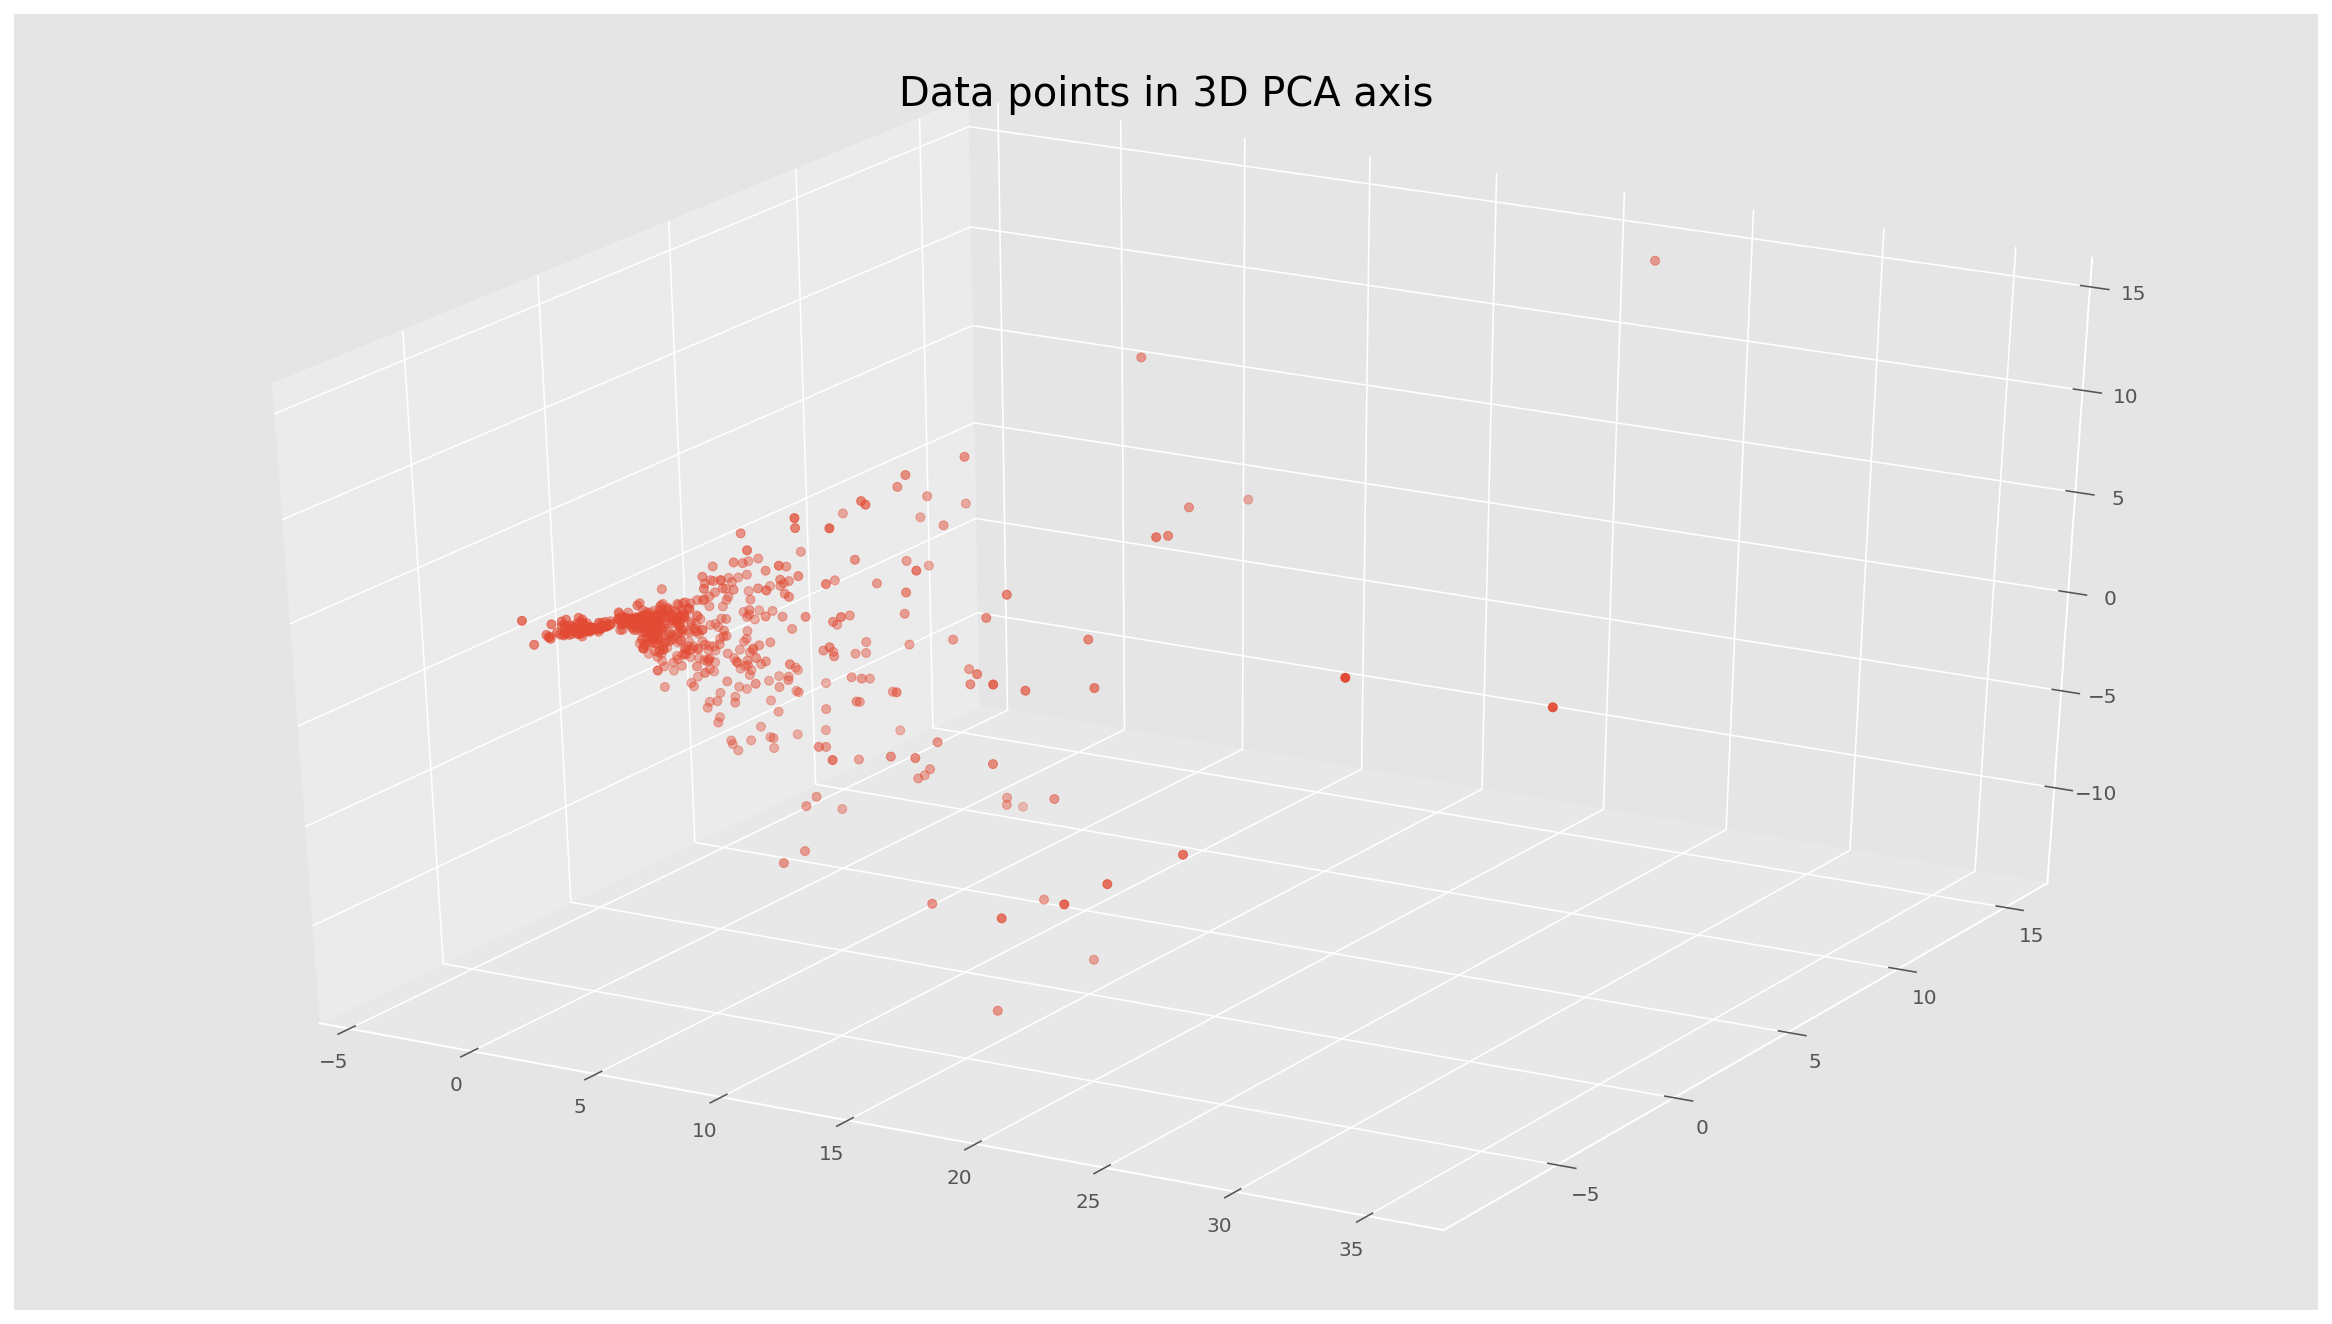

In [13]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

scores, distortions = [None] * 7, [None] * 7
scores[0], scores[1], distortions[0], distortions[1] = 0, 0, 0, 0

for i in range(2, 7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    scores[i] = silhouette_score(tocluster, kmeans.labels_)
    distortions[i] = sum(np.min(cdist(tocluster, kmeans.cluster_centers_,
                                        'euclidean'), axis = 1)) / tocluster.shape[0]

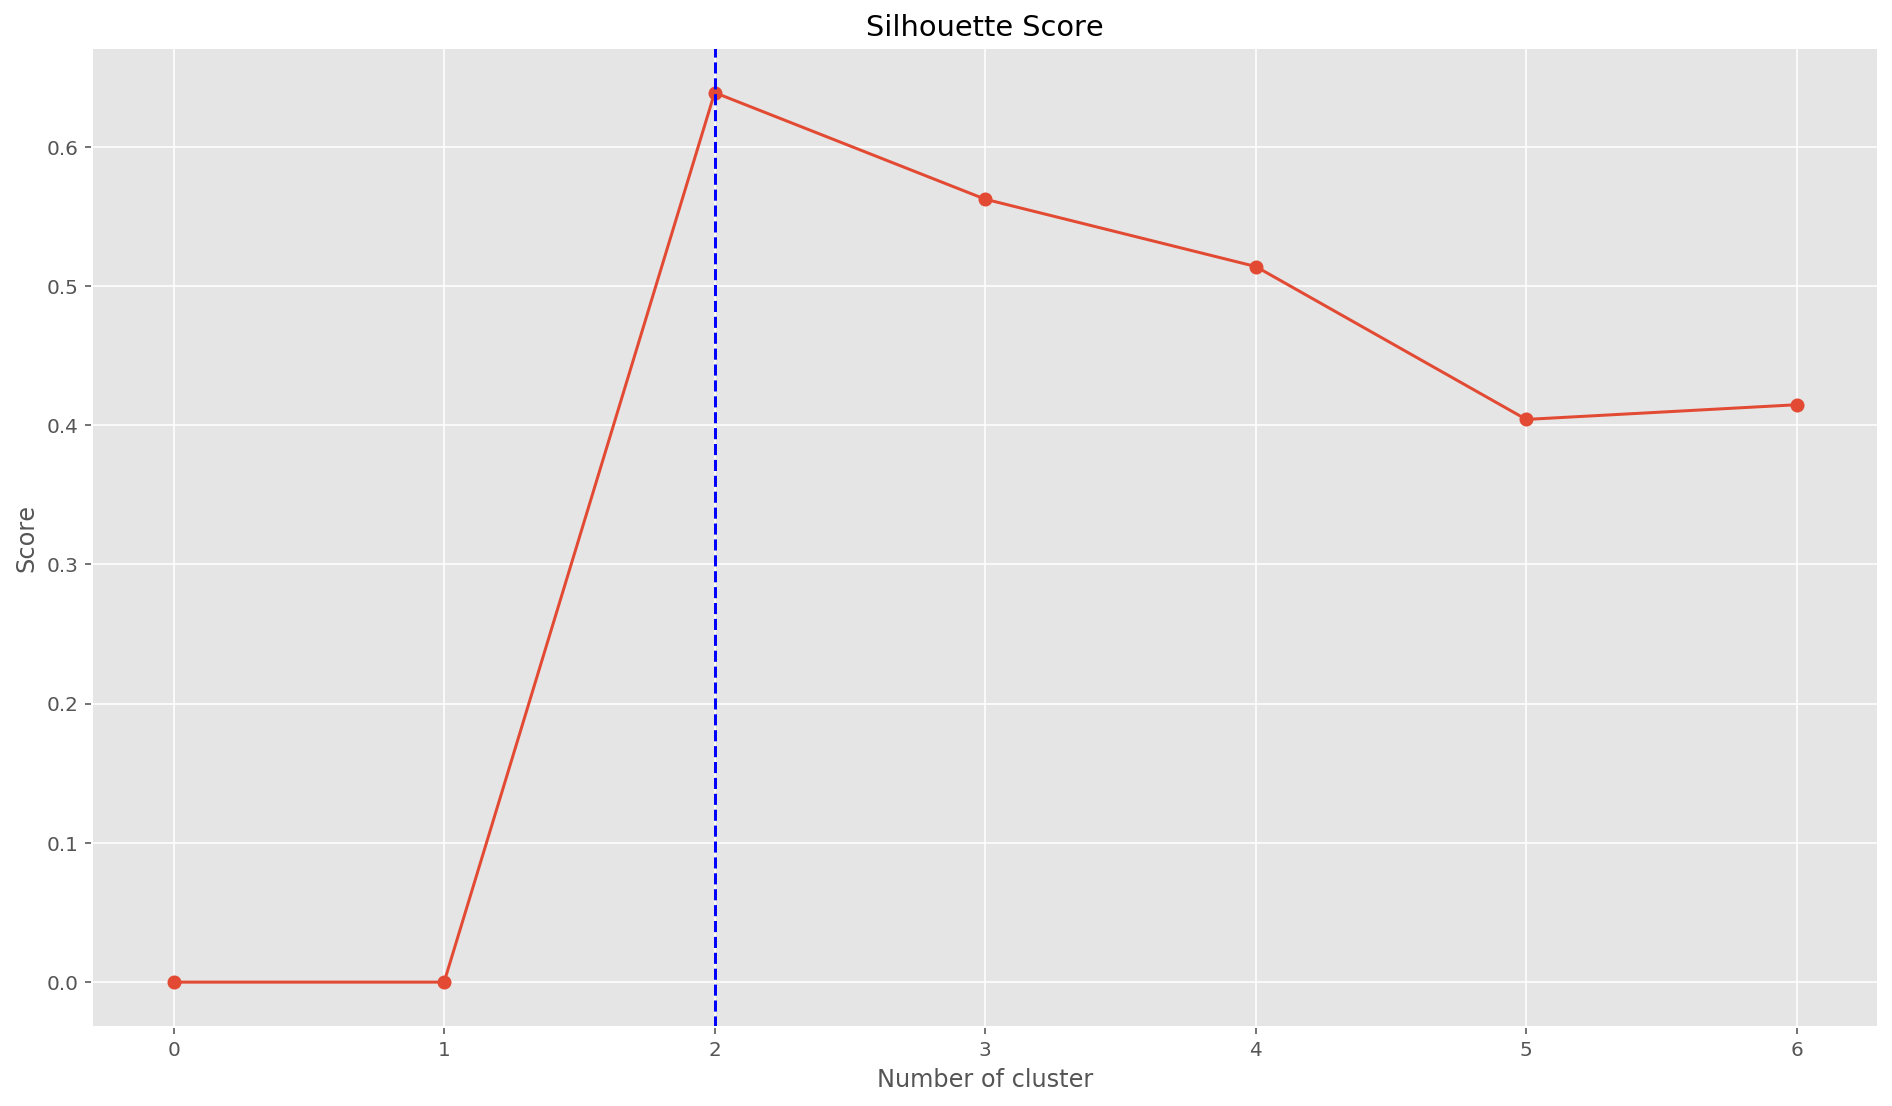

In [15]:
plt.plot(range(0 ,7), scores, '-o')
plt.axvline(x = scores.index(max(scores)), color = 'blue', linestyle = '--')
plt.xlabel('Number of cluster')
plt.ylabel('Score')
plt.title('Silhouette Score') 
plt.show()

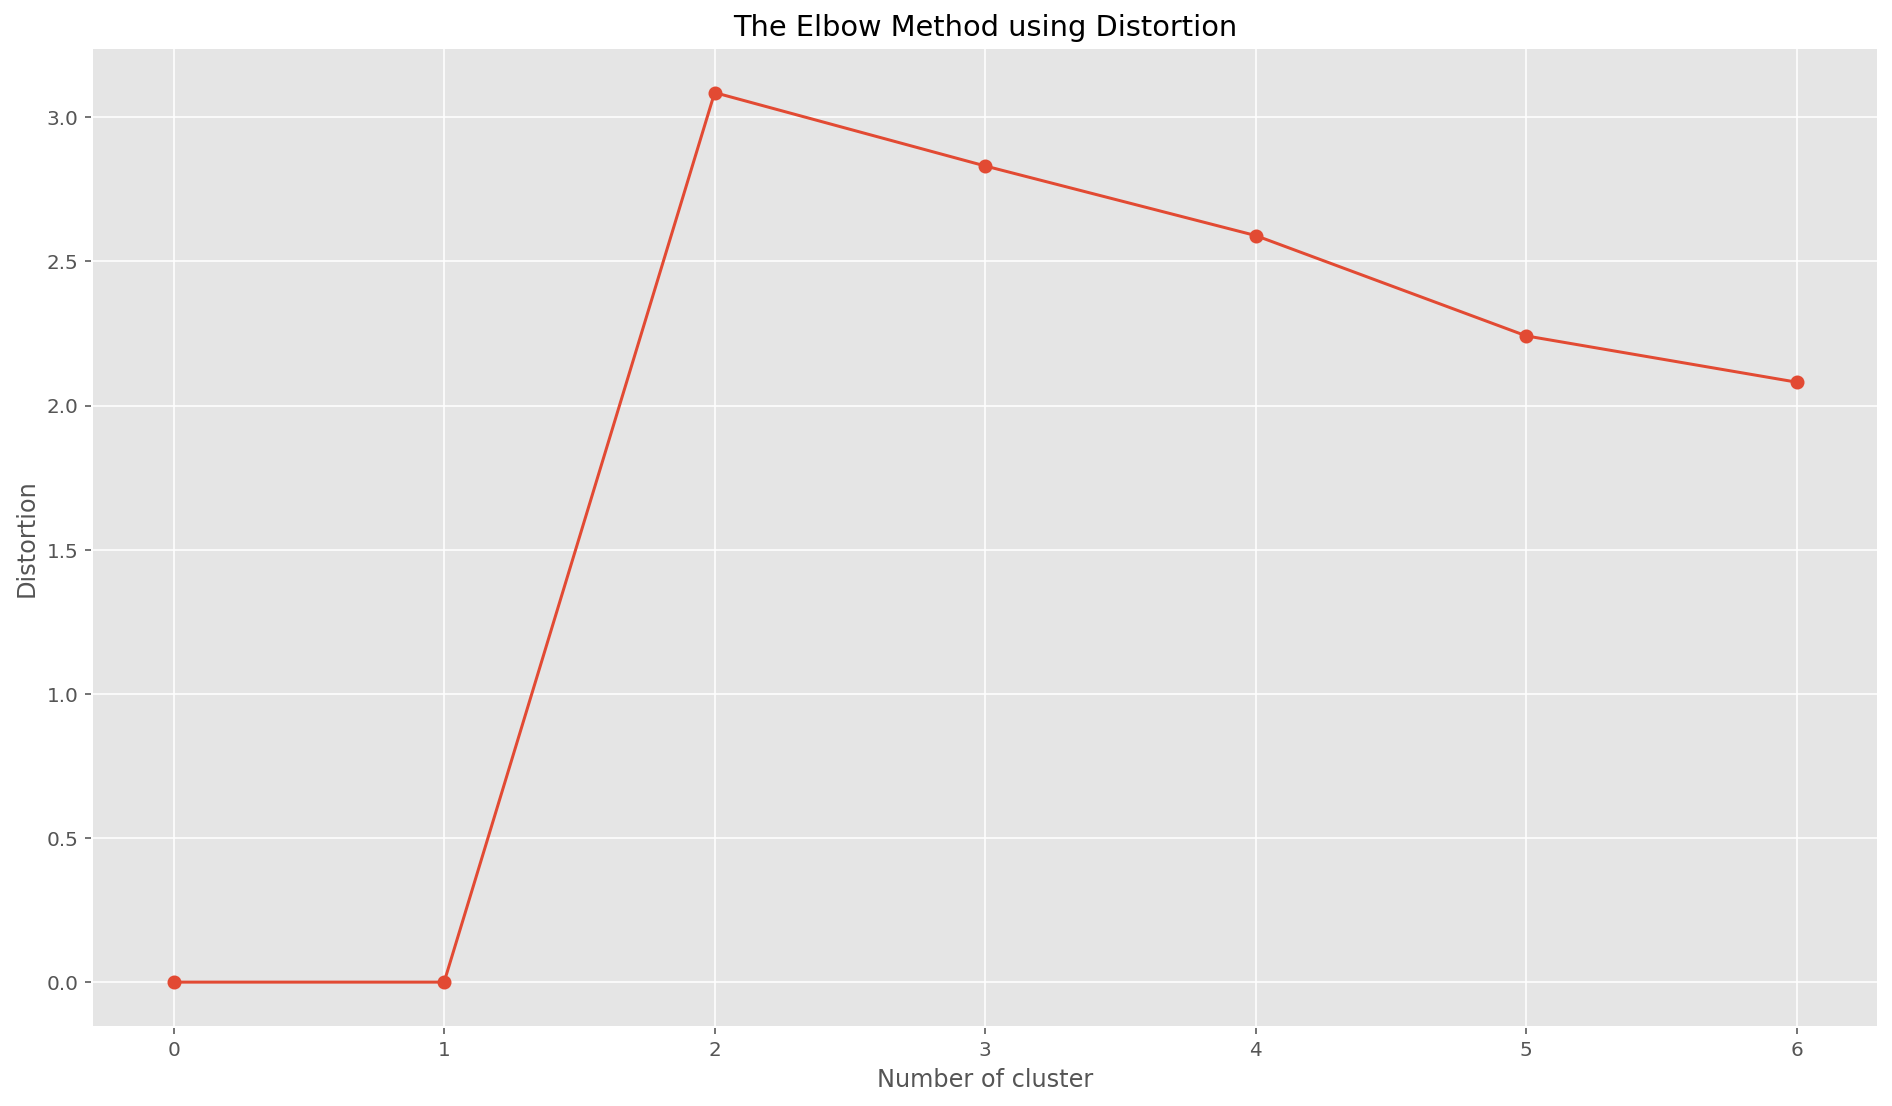

In [16]:
plt.plot(range(0 ,7), distortions, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [17]:
#best_k = scores.index(max(scores))
best_k = 3
best_k

3

In [18]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = best_k, random_state = 0).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

centers

array([[-1.8514473 ,  0.03298249, -0.12038311],
       [16.9001041 , -0.54669149, -1.34332241],
       [ 4.74414123, -0.02728106,  0.87752215]])

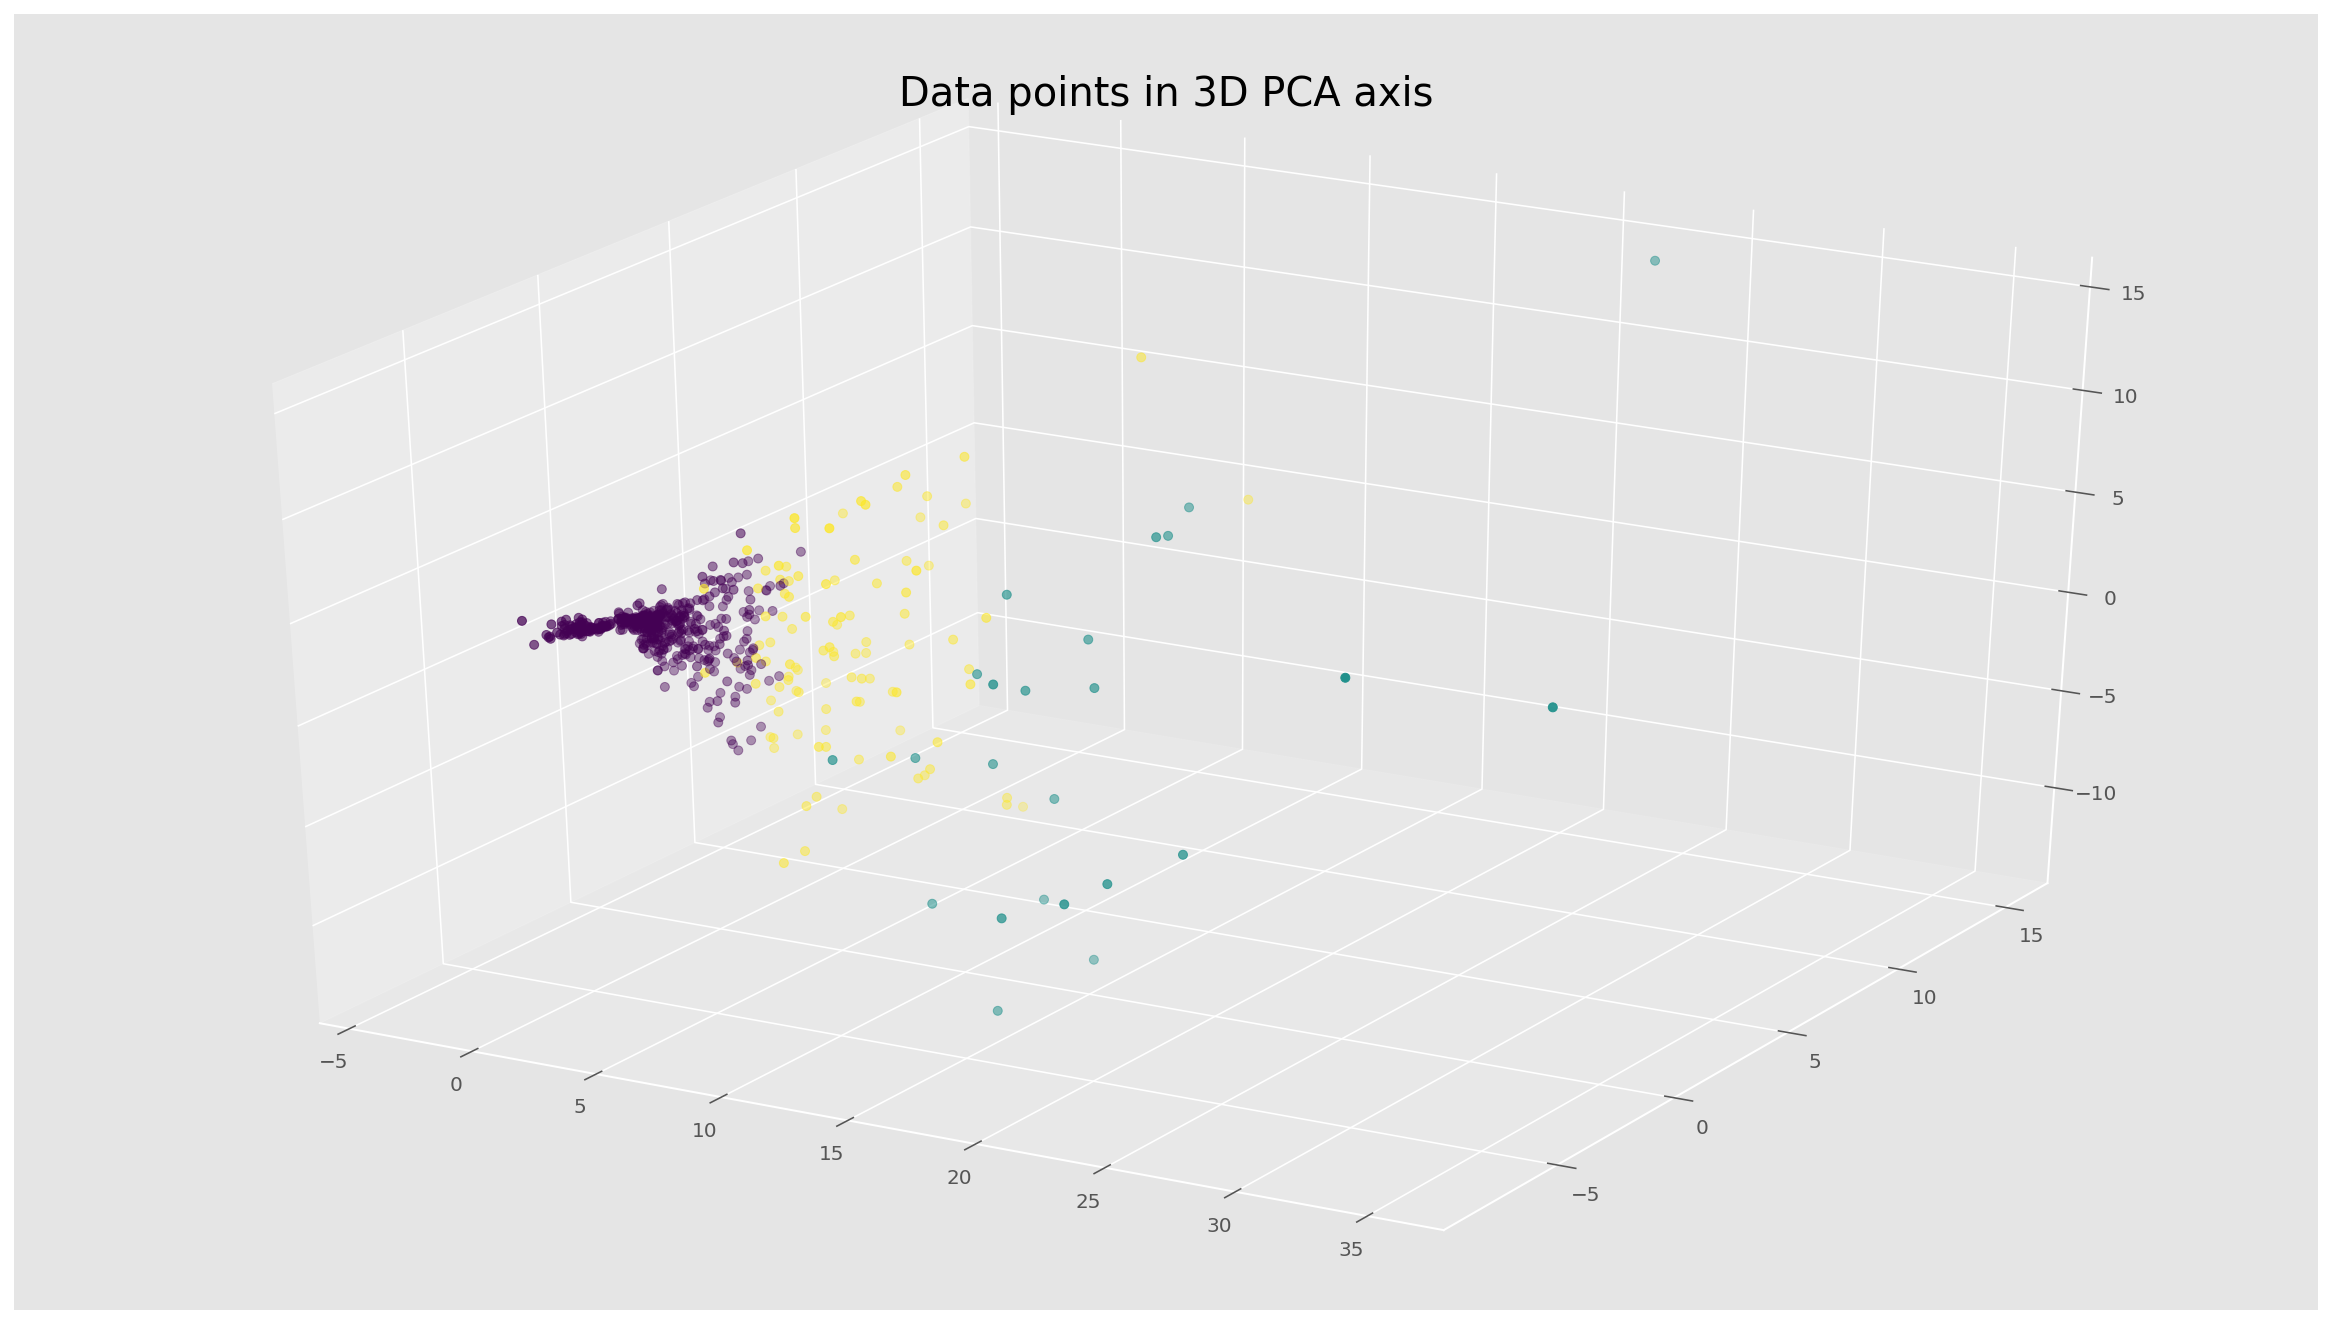

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

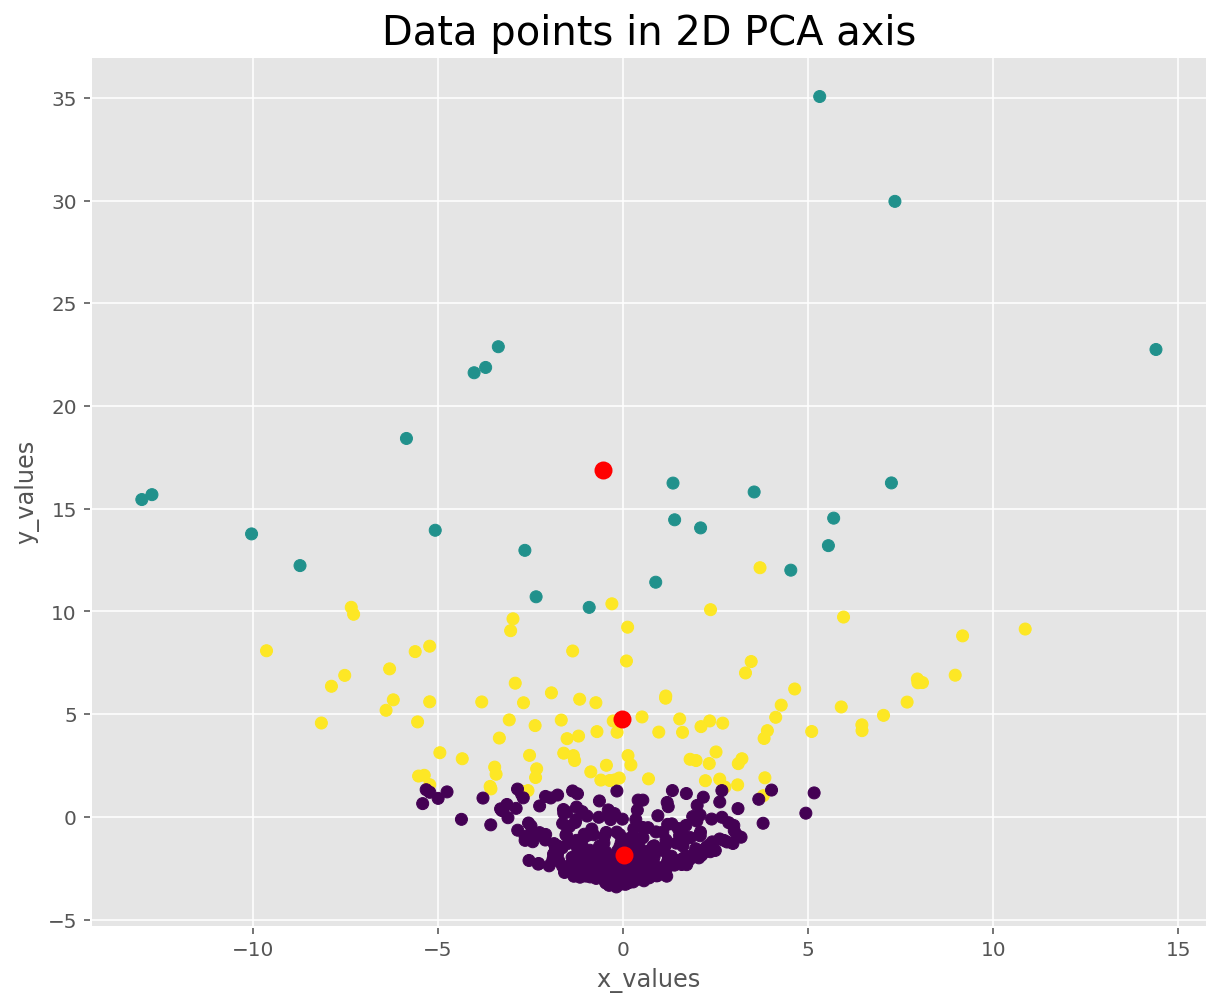

In [20]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(tocluster[1], tocluster[0], c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize = 8, color = 'red', alpha = 1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize = 20)
plt.show()

In [21]:
movies_ratings['cluster'] = c_preds
display(movies_ratings.head(3))
print('Shape:', movies_ratings.shape)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape: (610, 9686)


In [22]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9686 entries, '71 (2014) to cluster
dtypes: int32(1), int64(9685)
memory usage: 45.1 MB


In [23]:
cluster = list()
for i in range(best_k):
    cluster.append(movies_ratings[movies_ratings['cluster'] == i].drop('cluster', axis = 1).mean())

In [24]:
cluster[0].sort_values(ascending = False)[0:15]

title
Shawshank Redemption, The (1994)             0.455487
Forrest Gump (1994)                          0.436853
Pulp Fiction (1994)                          0.420290
Silence of the Lambs, The (1991)             0.378882
Matrix, The (1999)                           0.337474
Braveheart (1995)                            0.320911
Schindler's List (1993)                      0.304348
Jurassic Park (1993)                         0.293996
Star Wars: Episode IV - A New Hope (1977)    0.293996
Apollo 13 (1995)                             0.285714
Terminator 2: Judgment Day (1991)            0.279503
Toy Story (1995)                             0.256729
Usual Suspects, The (1995)                   0.248447
Fugitive, The (1993)                         0.248447
Fight Club (1999)                            0.246377
dtype: float64

In [25]:
def createMovieInfoList(movielist):
    genre_list = list()
    for x in movies['title']:
        if x in movielist:
            for y in movies[movies['title'] == x].genres.values:
                 genre_list.append(y)
    return genre_list

In [26]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [27]:
movielist = list(cluster[0].index)
data = pd.DataFrame()
data['genres'] = createMovieInfoList(movielist)

In [28]:
set_keywords = set()
for liste_keywords in data['genres'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [29]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

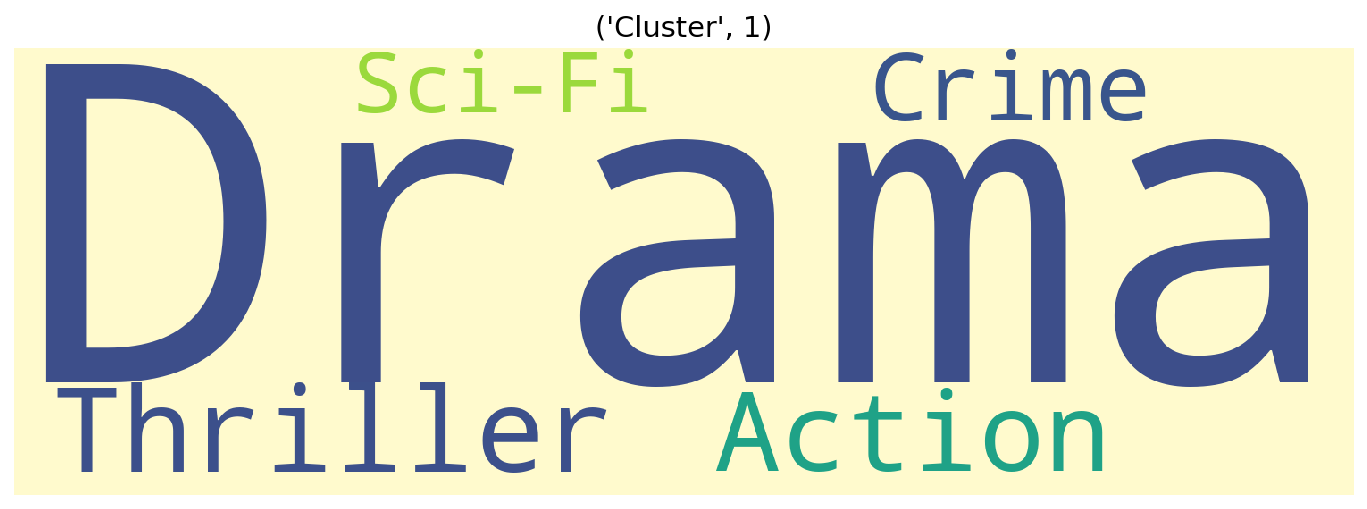

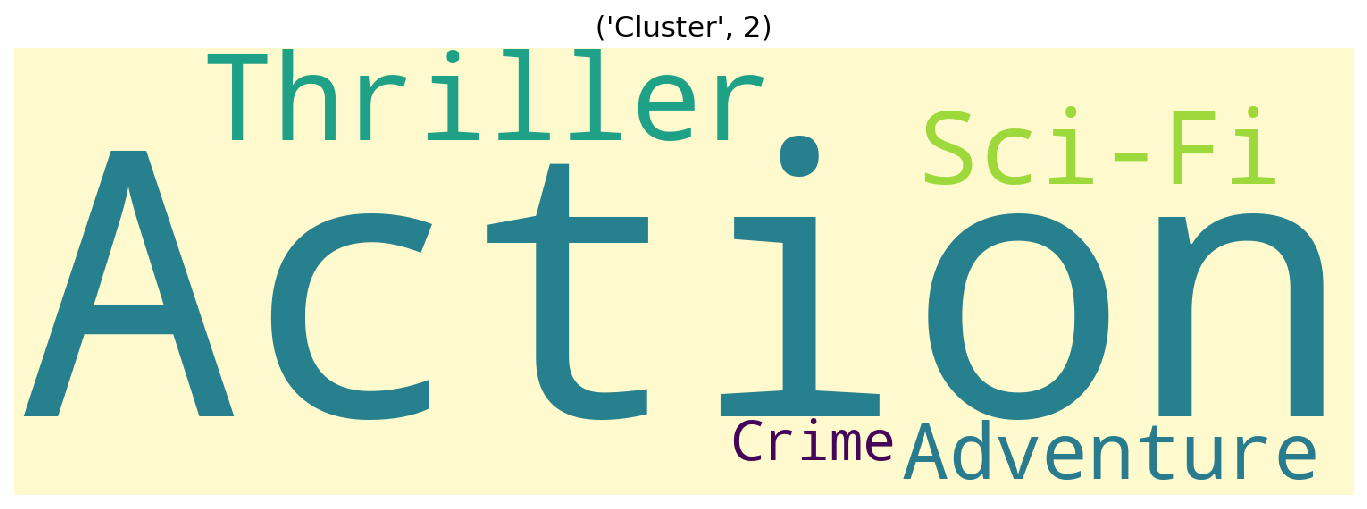

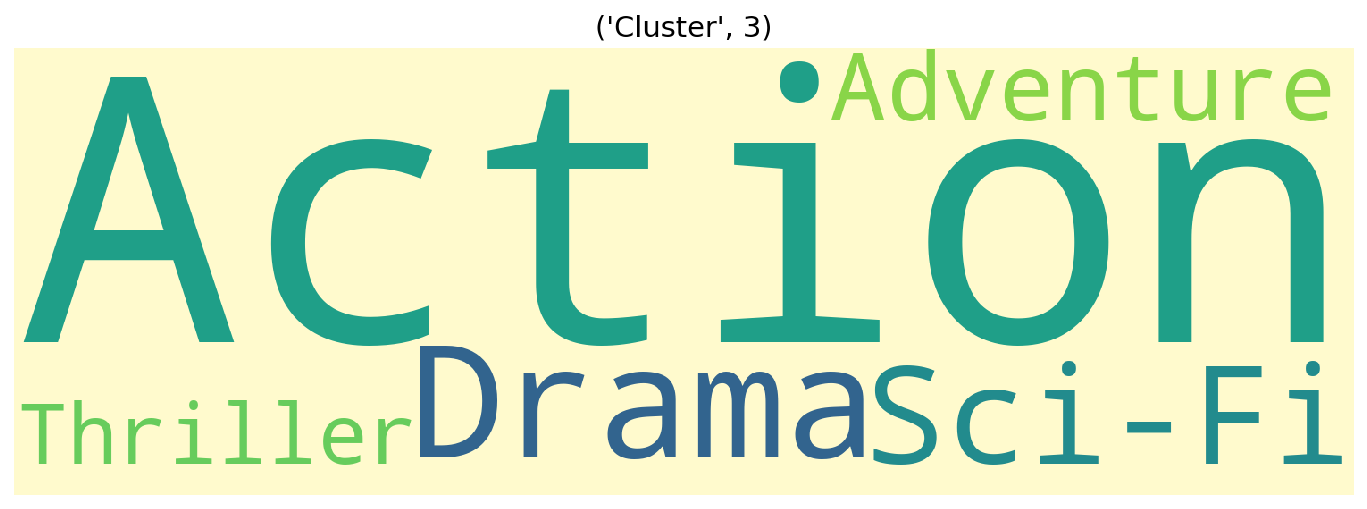

In [30]:
favorite_genre = list()
for i in range(best_k):
    movielist = list(cluster[i].sort_values(ascending = False)[0:15].index)
    data = pd.DataFrame()

    data['genres'] = createMovieInfoList(movielist)
    keyword_occurences, dum = count_word(data, 'genres', set_keywords)
    favorite_genre.append(keyword_occurences[0:5])
    
    name = "Cluster", (i + 1)
    makeCloud(keyword_occurences[0:5], name, "lemonchiffon")